In [1]:
from Project.data import Hotelsdata
from Project.methods import Strategy

<h1>Data import

In [2]:
path = 'Project\Datasets'
data = Hotelsdata(path)

<h1>EDA

<h3>Guests dataset

In [3]:
#Assigning the guests DataFrame to a variable "df_guests" so the notebook runs faster (avoid calling everytime data.guests)
df_guests = data.guests
df_guests.head()

,guest,discount,guest_num
0,guest_1,0.09,1
1,guest_2,0.00,2
2,guest_3,0.07,3
3,guest_4,0.00,4
4,guest_5,0.10,5


In [4]:
#Information about the elements contained in the table
df_guests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   guest      4000 non-null   object 
 1   discount   4000 non-null   float64
 2   guest_num  4000 non-null   int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 78.2+ KB


In [5]:
#Some variables related to guests and their discounts

print(f"\033[1mAmount of guests:\033[0m {df_guests['guest'].count():,}")
print(f"\033[1mMean discount:\033[0m {round(df_guests['discount'].mean(),2)}")
print(f"\033[1mMin discount:\033[0m {round(df_guests['discount'].min(),2)}")
print(f"\033[1mMax discount:\033[0m {round(df_guests['discount'].max(),2)}")
print(f"\033[1mList order by discount (descending):\033[0m")
print(df_guests.set_index('guest').sort_values(by='discount', ascending=False)['discount'])

Amount of guests: 4,000
Mean discount: 0.09
Min discount: 0.0
Max discount: 0.19
List order by discount (descending):
guest
guest_2575    0.19
guest_3851    0.19
guest_3677    0.19
guest_1001    0.19
guest_2267    0.19
              ... 
guest_291     0.00
guest_1072    0.00
guest_152     0.00
guest_2225    0.00
guest_1160    0.00
Name: discount, Length: 4000, dtype: float64


<h3>Hotels dataset

In [6]:
#Assigning the hotels DataFrame to a variable "df_hotels" so the notebook runs faster (avoid calling everytime data.hotels)
df_hotels = data.hotels
df_hotels.head()

,hotel,rooms,price,hotel_num
0,hotel_1,13,273,1
1,hotel_2,18,92,2
2,hotel_3,12,141,3
3,hotel_4,18,157,4
4,hotel_5,7,298,5


In [7]:
#Information about the elements contained in the table
print(df_hotels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   hotel      400 non-null    object
 1   rooms      400 non-null    int64 
 2   price      400 non-null    int64 
 3   hotel_num  400 non-null    int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 11.1+ KB
None


In [8]:
#Some variables related to hotels and their rooms and prices

print(f"\033[1mAmount of hotels:\033[0m {df_hotels['hotel'].count():,}")
print(f" ")

print(f"\033[1mMean rooms per hotel:\033[0m {df_hotels['rooms'].mean().astype(int)}")
print(f"\033[1mMin rooms available in a hotel:\033[0m {df_hotels['rooms'].min().astype(int)}")
print(f"\033[1mMax rooms available in a hotel:\033[0m {df_hotels['rooms'].max().astype(int)}")
print(f"\033[1mList of hotels ordered by rooms available (descending):\033[0m")
print(df_hotels.groupby('hotel').sum().sort_values(by='rooms', ascending=False)['rooms'])
print(f" ")

print(f"\033[1mMean price:\033[0m {df_hotels['price'].mean().astype(int)}")
print(f"\033[1mMin price:\033[0m {df_hotels['price'].min().astype(int)}")
print(f"\033[1mMax price:\033[0m {df_hotels['price'].max().astype(int)}")
print(f"\033[1mList of hotels ordered by price (descending):\033[0m")
print(df_hotels.groupby('hotel').sum().sort_values(by='price', ascending=False)['price'])

Amount of hotels: 400
 
Mean rooms per hotel: 11
Min rooms available in a hotel: 5
Max rooms available in a hotel: 19
List of hotels ordered by rooms available (descending):
hotel
hotel_378    19
hotel_11     19
hotel_303    19
hotel_122    19
hotel_346    19
             ..
hotel_198     5
hotel_188     5
hotel_179     5
hotel_171     5
hotel_330     5
Name: rooms, Length: 400, dtype: int64
 
Mean price: 177
Min price: 50
Max price: 299
List of hotels ordered by price (descending):
hotel
hotel_27     299
hotel_230    299
hotel_5      298
hotel_168    298
hotel_184    298
            ... 
hotel_24      53
hotel_354     52
hotel_301     52
hotel_190     50
hotel_49      50
Name: price, Length: 400, dtype: int64


<h3>Preference dataset

In [9]:
#Assigning the preference DataFrame to a variable "df_preference" so the notebook runs faster (avoid calling everytime data.preference)
df_preference = data.preference
df_preference.head()

,guest,hotel,priority,guest_num,hotel_num
0,guest_1,hotel_168,1,1,168
1,guest_1,hotel_207,2,1,207
2,guest_1,hotel_222,3,1,222
3,guest_1,hotel_124,4,1,124
4,guest_1,hotel_223,5,1,223


In [10]:
#Information about the elements contained in the table
print(df_preference.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95778 entries, 0 to 95777
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   guest      95778 non-null  object
 1   hotel      95778 non-null  object
 2   priority   95778 non-null  int64 
 3   guest_num  95778 non-null  int32 
 4   hotel_num  95778 non-null  int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 2.9+ MB
None


In [11]:
#Some variables related to guests' preferences

print(f"\033[1mLargest list of priorities:\033[0m {df_preference['priority'].max():,} hotels")
print(f"\033[1mShortest list of priorities:\033[0m {df_preference['priority'].min():,} hotel")
print(df_preference.groupby('guest').count().sort_values(by='priority', ascending=False)['priority'])
print(f" ")

print(f"\033[1mNumber of times a hotel is in the list of priorities:\033[0m")
print(df_preference.groupby('hotel').count().sort_values(by='guest', ascending=False)['guest'])
print(f" ")

Largest list of priorities: 49 hotels
Shortest list of priorities: 1 hotel
guest
guest_954     49
guest_492     49
guest_499     49
guest_1253    49
guest_2809    49
              ..
guest_3010     1
guest_3027     1
guest_3439     1
guest_3064     1
guest_2963     1
Name: priority, Length: 4000, dtype: int64
 
Number of times a hotel is in the list of priorities:
hotel
hotel_237    290
hotel_277    286
hotel_392    271
hotel_376    270
hotel_185    268
            ... 
hotel_129    207
hotel_186    206
hotel_212    199
hotel_395    198
hotel_178    196
Name: guest, Length: 400, dtype: int64
 


<h1>Analysis

In [12]:
#Assign the datasets to the Strategy class
strategy = Strategy(guests = df_guests, hotels = df_hotels, pref = df_preference)

<h3>Random strategy

In [13]:
random = strategy.random
random

,guest,hotel,net_earning,guest_satisfaction
0,guest_2608,hotel_332,255.76,4
1,guest_1774,hotel_259,183.96,2
2,guest_2855,hotel_326,187.92,2
3,guest_459,hotel_269,110.49,1
4,guest_3915,hotel_199,201.60,1
...,...,...,...,...
3920,guest_3060,hotel_337,70.50,2
3921,guest_647,hotel_344,83.30,4
3922,guest_1615,hotel_263,236.60,5
3923,guest_794,hotel_169,274.51,1


<h3>Preference strategy

In [14]:
preference = strategy.preference
preference

,guest,hotel,net_earning,guest_satisfaction
0,guest_1,hotel_168,271.18,1
1,guest_2,hotel_369,133.00,1
2,guest_3,hotel_157,60.45,1
3,guest_4,hotel_235,136.00,1
4,guest_5,hotel_121,50.40,1
...,...,...,...,...
3970,guest_3996,hotel_350,56.00,1
3971,guest_3997,hotel_19,96.05,1
3972,guest_3998,hotel_117,262.26,2
3973,guest_3999,hotel_277,258.52,1


<h3>Price strategy

In [15]:
price = strategy.price
price

,guest,hotel,net_earning,guest_satisfaction
0,guest_1,hotel_22,55.51,5
1,guest_2,hotel_26,55.00,4
2,guest_3,hotel_6,53.94,2
3,guest_4,hotel_321,54.00,5
4,guest_5,hotel_121,50.40,1
...,...,...,...,...
3920,guest_3996,hotel_115,244.00,4
3921,guest_3997,hotel_147,213.35,3
3922,guest_3998,hotel_352,256.68,2
3923,guest_3999,hotel_277,258.52,1


<h3>Rooms strategy

In [16]:
rooms = strategy.rooms
rooms

,guest,hotel,net_earning,guest_satisfaction
0,guest_1,hotel_269,115.57,5
1,guest_2,hotel_79,75.00,4
2,guest_3,hotel_179,159.03,3
3,guest_4,hotel_212,205.00,5
4,guest_5,hotel_85,263.70,5
...,...,...,...,...
3869,guest_3996,hotel_110,140.00,5
3870,guest_3997,hotel_316,158.95,5
3871,guest_3998,hotel_110,130.20,5
3872,guest_3999,hotel_110,128.80,3


<h1>Strategies' summary

In [17]:
import pandas as pd

In [18]:
#Create a summary with the outcomes from each strategy

print(f"\033[1mSatisfaction is measured from 1 (completely satisfied) to 5 (not satisfied)\033[0m")
Results = pd.DataFrame(['Random', 'Preference', 'Price', 'Rooms'])
Results.columns = ['Strategy'] + list(Results.columns[1:])
Results['Guests allocated'] = [f"{(random['guest'].count()):,}", f"{(preference['guest'].count()):,}", f"{(price['guest'].count()):,}", f"{(rooms['guest'].count()):,}"]
Results['vs_total guests'] = [f"{round((random['guest'].count()/data.guests['guest'].count())*100,2)}%", f"{round((preference['guest'].count()/data.guests['guest'].count())*100,2)}%", f"{round((price['guest'].count()/data.guests['guest'].count())*100,2)}%", f"{round((rooms['guest'].count()/data.guests['guest'].count())*100,2)}%"]
Results['Average satisfaction'] = [round((random['guest_satisfaction'].mean()),0), round((preference['guest_satisfaction'].mean()),0), round((price['guest_satisfaction'].mean()),0), round((rooms['guest_satisfaction'].mean()),0)]
Results['Hotels occupied'] = [random['hotel'].nunique(), preference['hotel'].nunique(), price['hotel'].nunique(), rooms['hotel'].nunique()]
Results['vs total hotels'] = [f"{round((random['hotel'].nunique()/data.hotels['hotel'].count())*100,2)}%", f"{round((preference['hotel'].nunique()/data.hotels['hotel'].count())*100,2)}%", f"{round((price['hotel'].nunique()/data.hotels['hotel'].count())*100,2)}%", f"{round((rooms['hotel'].nunique()/data.hotels['hotel'].count())*100,2)}%"]

hotel_list = pd.Series(data.hotels.rooms.values, index=data.hotels.hotel)
random_remaining_rooms = hotel_list.subtract(random.groupby('hotel')['guest'].count())
priority_remaining_rooms = hotel_list.subtract(preference.groupby('hotel')['guest'].count())
price_remaining_rooms = hotel_list.subtract(price.groupby('hotel')['guest'].count())
room_remaining_rooms = hotel_list.subtract(rooms.groupby('hotel')['guest'].count())

Results['Hotels fully occupied'] = [len(random_remaining_rooms[random_remaining_rooms == 0]), len(priority_remaining_rooms[priority_remaining_rooms == 0]), len(price_remaining_rooms[price_remaining_rooms == 0]), len(room_remaining_rooms[room_remaining_rooms == 0])]
Results['vs hotels occupied'] = [f"{round((len(random_remaining_rooms[random_remaining_rooms == 0])/random['hotel'].nunique())*100,2)}%", f"{round((len(priority_remaining_rooms[priority_remaining_rooms == 0])/preference['hotel'].nunique())*100,2)}%", f"{round((len(price_remaining_rooms[price_remaining_rooms == 0])/price['hotel'].nunique())*100,2)}%", f"{round((len(room_remaining_rooms[room_remaining_rooms == 0])/rooms['hotel'].nunique())*100,2)}%"]
Results['Average earnings per hotel'] = [f"€{round((random['net_earning'].sum())/random['hotel'].nunique(),2):,}", f"€{round((preference['net_earning'].sum())/preference['hotel'].nunique(),2):,}", f"€{round((price['net_earning'].sum())/price['hotel'].nunique(),2):,}", f"€{round((rooms['net_earning'].sum())/rooms['hotel'].nunique(),2):,}"]
Results['Strategy´s total earnings'] = [f"€{round(random['net_earning'].sum(),2):,}", f"€{round(preference['net_earning'].sum(),2):,}", f"€{round(price['net_earning'].sum(),2):,}", f"€{round(rooms['net_earning'].sum(),2):,}"]
Results.set_index('Strategy')

Satisfaction is measured from 1 (completely satisfied) to 5 (not satisfied)


,Guests allocated,vs_total guests,Average satisfaction,Hotels occupied,vs total hotels,Hotels fully occupied,vs hotels occupied,Average earnings per hotel,Strategy´s total earnings
Strategy,,,,,,,,,
Random,"3,925",98.12%,3.0,388,97.0%,316,81.44%,"€1,594.82","€618,788.84"
Preference,"3,975",99.38%,1.0,400,100.0%,255,63.75%,"€1,608.99","€643,597.53"
Price,"3,925",98.12%,3.0,388,97.0%,319,82.22%,"€1,453.83","€564,085.08"
Rooms,"3,874",96.85%,3.0,397,99.25%,344,86.65%,"€1,585.7","€629,523.35"


<h1>Data visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#Create a function to keep manipulation and changes inside it, without affecting the original DataFrames.
#Used 
def combined():
    random['strategy'] = 'Random'
    preference['strategy'] = 'Preference'
    price['strategy'] = 'Price'
    rooms['strategy'] = 'Room'

    combined_df = pd.concat([random, preference, price, rooms])
    return combined_df
combined = combined()

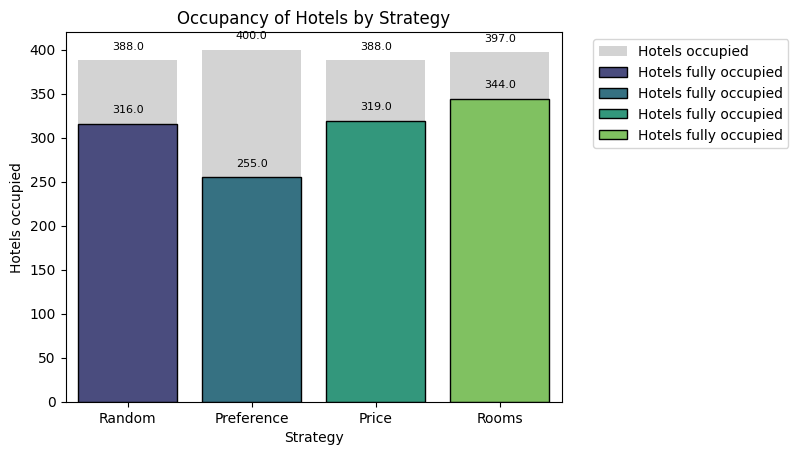

In [21]:
#Bar plot to understand how many of the hotels occupied were fully occupied

ax = sns.barplot(data=Results, x='Strategy', y='Hotels occupied', color='lightgrey', label='Hotels occupied')
ax = sns.barplot(data=Results, x='Strategy', y='Hotels fully occupied', hue='Strategy', palette='viridis', edgecolor="black", label='Hotels fully occupied')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Occupancy of Hotels by Strategy')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

Satisfaction is measured from 1 (completely satisfied) to 5 (not satisfied)


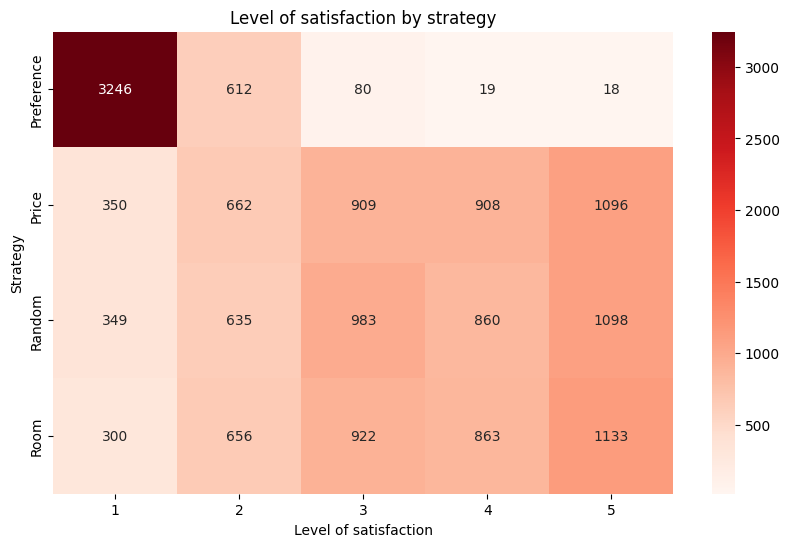

In [22]:
print(f"\033[1mSatisfaction is measured from 1 (completely satisfied) to 5 (not satisfied)\033[0m")

# Pivot table created for the heatmap graph
pivot = pd.pivot_table(combined, values='guest', index='strategy', columns='guest_satisfaction', aggfunc='count', fill_value=0)

#Heatmap to easily conclude which strategy outputs more satisfied guests
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='Reds', fmt='g', cbar=True)
plt.title('Level of satisfaction by strategy')
plt.xlabel('Level of satisfaction')
plt.ylabel('Strategy')
plt.show()

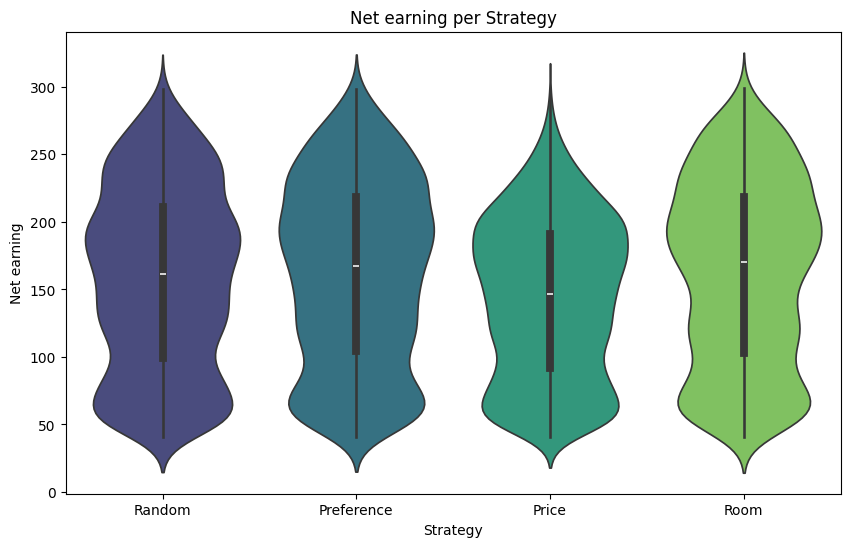

In [23]:
# Violin plot to analyse the distribution of earnings per hotel, per strategy.
plt.figure(figsize=(10, 6))
sns.violinplot(x='strategy', y='net_earning', hue = 'strategy', data=combined, palette = 'viridis', legend = False)
plt.title('Net earning per Strategy')
plt.xlabel('Strategy')
plt.ylabel('Net earning')
plt.show()

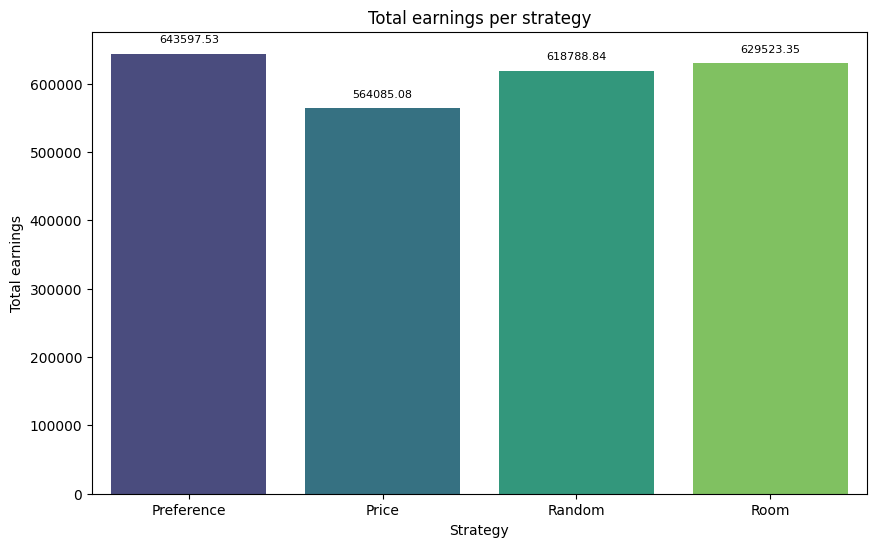

In [24]:
#Bar plot to calculate the total earning per strategy

# Earning per strategy
earning = combined.groupby('strategy')['net_earning'].sum().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='strategy', y='net_earning', hue='strategy', data=earning, palette='viridis')
plt.title('Total earnings per strategy')
plt.xlabel('Strategy')
plt.ylabel('Total earnings')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()